In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
imgs_path = "input\Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

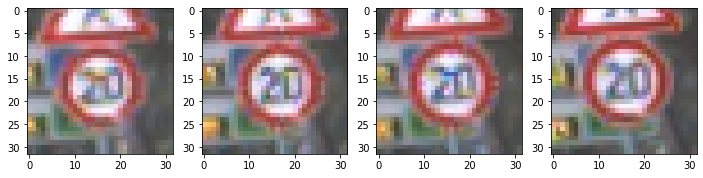

In [3]:
plt.figure(figsize = (12,12))

for i in range(4) :
    plt.subplot(1, 4, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

In [4]:
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.8, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

In [6]:
model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())

#2 Dense layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

In [7]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history= model.fit(X_train,Y_train,
                epochs=20,
                batch_size=64,
                validation_data=(X_val,Y_val))

Epoch 1/20
123/123 [==============================] - 11s 33ms/step - loss: 3.1271 - accuracy: 0.2186 - val_loss: 2.2193 - val_accuracy: 0.2988
Epoch 2/20
123/123 [==============================] - 3s 26ms/step - loss: 1.4889 - accuracy: 0.5045 - val_loss: 1.1930 - val_accuracy: 0.6480
Epoch 3/20
123/123 [==============================] - 3s 26ms/step - loss: 0.7372 - accuracy: 0.7516 - val_loss: 0.4419 - val_accuracy: 0.8414
Epoch 4/20
123/123 [==============================] - 3s 26ms/step - loss: 0.4131 - accuracy: 0.8674 - val_loss: 0.4954 - val_accuracy: 0.8469
Epoch 5/20
123/123 [==============================] - 3s 26ms/step - loss: 0.2638 - accuracy: 0.9138 - val_loss: 0.3134 - val_accuracy: 0.8995
Epoch 6/20
123/123 [==============================] - 3s 26ms/step - loss: 0.1985 - accuracy: 0.9346 - val_loss: 0.2114 - val_accuracy: 0.9368
Epoch 7/20
123/123 [==============================] - 3s 26ms/step - loss: 0.1562 - accuracy: 0.9518 - val_loss: 0.1391 - val_accuracy: 0.957

Text(0.5, 1.0, 'Loss')

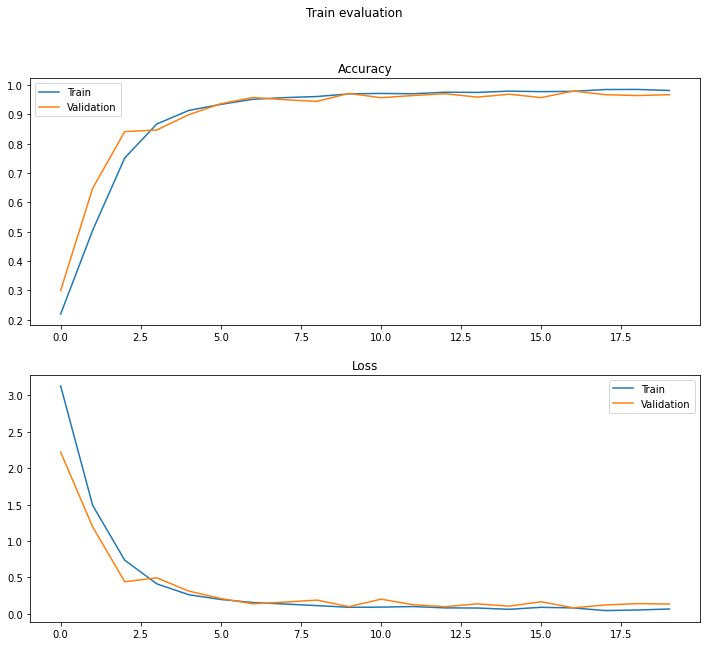

In [8]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

In [9]:
Y_test = np.argmax(Y_test,axis=1)

Y_pred= model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)

print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(Y_test,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

491/491 [==============================] - 2s 3ms/step
-Acuracy achieved: 96.60%
-Accuracy by model was: 98.19%
-Accuracy by validation was: 96.75%
